# Scoring

Welcome to the tutorial for how to score participant data from Will Decker's honors thesis project. This procedure makes use of `scoring_module.py`, a custom built module for scoring data generated for this specific project. Despite this, its usability is highly versatile. In this notebook, you will find out exactly how to use the classes, methods and attributes from the scoring module.  

## Import
To call in the module, you must import it.

In [1]:
# imports
from scoring_module import * # this imports everything from the scoring module

## Let's get started!

There are a few prelimenary steps to take before you can get to the real data analysis. First, we've got to clean the data and then score it. These two things can be done using the module. 

1. Set the `Data` class and point it to a directory which contains the data

In [2]:
data = Data(path=f"/Users/{os.getlogin()}/Box Sync/willdecker/LSU Undergrad/Honors-Thesis/experiment/PBRC/data") 

2. Now we must give the our new object, `data` some subject IDs to read. Subject IDs are found in the participant database but follow a standard convention of 'sub-[#]'
3. We can also use these subject IDs to parse the individual datafiles into discrete entities so that future analyses and cleaning can be done

In [3]:
data.parse_files() # finds the files based on the subject IDs

Data()

You can see which files are now a part of the `data` object.

In [4]:
data.files

,pwd,files
0,/Users/lendlab/Box Sync/willdecker/LSU Undergr...,sub-004_structured.csv
1,/Users/lendlab/Box Sync/willdecker/LSU Undergr...,sub-002_random.csv
2,/Users/lendlab/Box Sync/willdecker/LSU Undergr...,sub-003_structured.csv
3,/Users/lendlab/Box Sync/willdecker/LSU Undergr...,sub-007_structured.csv
4,/Users/lendlab/Box Sync/willdecker/LSU Undergr...,sub-005_random.csv
5,/Users/lendlab/Box Sync/willdecker/LSU Undergr...,sub-009_structured.csv
6,/Users/lendlab/Box Sync/willdecker/LSU Undergr...,sub-001_structured.csv
7,/Users/lendlab/Box Sync/willdecker/LSU Undergr...,sub-008_random.csv
8,/Users/lendlab/Box Sync/willdecker/LSU Undergr...,sub-006_random.csv
9,/Users/lendlab/Box Sync/willdecker/LSU Undergr...,sub-010_random.csv


4. Now we can score `data`. This will iterate through each file and mark individual responses in the data as correct or incorrect and then output a score

In [5]:
data.score();

/Users/lendlab/Box Sync/willdecker/LSU Undergrad/Honors-Thesis/github/Honors-Thesis/scoring/scoring_module.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anskey['score'][0] = (sum(anskey['assign_codes']))/12;
/Users/lendlab/Box Sync/willdecker/LSU Undergrad/Honors-Thesis/github/Honors-Thesis/scoring/scoring_module.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anskey['score'][0] = (sum(anskey['assign_codes']))/12;
/Users/lendlab/Box Sync/willdecker/LSU Undergrad/Honors-Thesis/github/Honors-Thesis/scoring/scoring_module.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

You can view these scores

In [6]:
data.scores

,random,structured
0,0.333333,0.416667
1,0.500000,0.500000
2,0.416667,0.416667
3,0.250000,0.583333
4,0.166667,0.416667


You can also view an individual participant's responses and score

In [7]:
data.indiv_score(subid='sub-010')

/Users/lendlab/Box Sync/willdecker/LSU Undergrad/Honors-Thesis/github/Honors-Thesis/scoring/scoring_module.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anskey['score'][0] = (sum(anskey['assign_codes']))/12;


,correct_key_resp,actual_key_resp,assign_codes,score
0,m,z,0,0.166667
1,v,z,0,NaN
2,v,m,0,NaN
3,m,v,0,NaN
4,v,z,0,NaN
5,z,z,1,NaN
6,z,m,0,NaN
7,m,v,0,NaN
8,z,m,0,NaN
9,v,m,0,NaN


If you need to, you can also remove individual scores. Check out the changes to `data.scores` after I remove a subject.

In [25]:
data.rm_subs(subids=['sub-002']) # this removes a subject.
data.score()
data.scores

,structured,random
0,0.583333,NaN
1,0.500000,NaN


`data.rm_subs` relies on a list data type, so you can remove one score or you can remove multiple with a list of files. But be careful. I have not written anything to add a subject back in. So if you remove a subject accidentally, you will need to re-run the entire code prior to removing the subject. Fortuntately, the code runs very fast.

## Statistics!

Now that we have cleaned the data, it is ready for statistical analysis. There is a class called `Stats` which has two built in statistical tests that are directly relevant to this project and the experiment design: a one sample t-test and a two-samples independent t-test. Below you will see how to compute them using the `Stats` class.

1. Set the `Stats` class and give it the scores that you computed above

In [8]:
stats = Stats(scores=data.scores)

2. Now compute your statistics. To do this, there is a method called `Stats.compute()`. There you can specify which test you want. Refer to the docstring:
```python
Stats.compute.__doc__
```
for more information on the arguments that this function takes.

For now, I will run both built in tests and denote which is which via comments. However, the files which I have chosen actually come from only one condition. So running a two-sample independent t-test will fail. It will be commented out but you should still be able to see how it is done with the module.

In [13]:
# one-sample  t-test
t1 = stats.compute(test=1, mu=0.33)

# two-sample independent t-test
# t2 = stats.compute(test=2)

3. To view the output from the test, you need to call the method `Stats.statistic`

In [14]:
# print(t2.statistic)
print(t1.statistic)

TtestResult(statistic=4.1, pvalue=0.007426519818900756, df=4)


What is great about this object method is that you can use the `data.scores` anywhere. Execute `type(data.scores)`. You will notice that it is a pandas dataframe. You can use this in other statistical tests or for other purposes if you wish. Below I have shown you some other ways `data.scores` can be used, like plotting with `matplotlib`.

Text(0, 0.5, 'score')

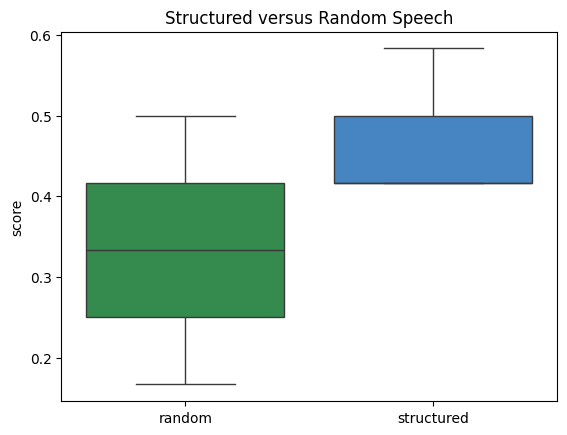

In [17]:
import seaborn as sns

sns.set_palette(palette=["#269947", "#3186D6"])
ax = sns.boxplot(data=stats.scores)
ax.set_title("Structured versus Random Speech");
ax.set_ylabel('score')